In [3]:
train_file_path = r"C:\Users\Praveen\machineLearningProject\housing\artifact\data_ingestion\2023-01-30-09-27-22\ingested_data\train\housing.csv"

In [2]:
import pandas as pd

In [5]:
#from box import configbox
#from box import Box
from box import ConfigBox

In [5]:
df = pd.read_csv(train_file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [4]:
df.shape

(16512, 10)

In [5]:
#Target Column 
df["median_house_value"]

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [6]:
x, y = df.drop(columns=["median_house_value"], axis=1), df[["median_house_value"]]

In [7]:
x.shape

(16512, 9)

In [8]:
y.shape

(16512, 1)

In [9]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [11]:
# Dropping the categorical column to handle the null values of numerical columns
numerical_column = x.drop(columns=['ocean_proximity'], axis=1)

In [12]:
numerical_column.shape

(16512, 8)

In [13]:
simple_imputer = SimpleImputer(strategy="median")

In [14]:
simple_imputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [15]:
df = simple_imputer.transform(numerical_column)

In [16]:
#simple_imputer.feature_names_in_

AttributeError: 'SimpleImputer' object has no attribute 'feature_names_in_'

In [17]:
simple_imputer.statistics_ # median value of each column

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [18]:
# Handling categorical column
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [19]:
simple_imputer = SimpleImputer(strategy="most_frequent")

In [21]:
#simple_imputer.fit_transform()

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [22]:
#Custom Transformer
class FeatureGenerator():

    def __init__(self, strategy="median"):
        self.strategy = strategy

    def fit(self, X):
        self.columns = X.columns
        for column in X.columns:
            self.statistic_.append(X[column].median())
        return self

    def transform(self, X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistic_[idx])
        return X
 

    def fit_transform(self, X):
        self.fit(X)
        self.transform(X)

# Check down we can use the baseestimator and TransformerMixin in feature grnearator class



In [23]:
from sklearn.base import BaseEstimator, TransformerMixin # check it in sklearn github base.py file 

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, strategy="median"):
        self.strategy = strategy

    def fit(self, X):
        self.columns = X.columns
        for column in X.columns:
            self.statistic_.append(X[column].median())
        return self

    def transform(self, X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistic_[idx])
        return X
 
    #No need of below function(fit_transform) if we use tranformermixin 
    #def fit_transform(self, X):
    #    self.fit(X)
    #    self.transform(X)



In [24]:
# How to conceate 2 arrays
import numpy as np
arr1 = np.arange(10)
arr2 = np.arange(10)

np.c_[arr1, arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [25]:
# To get the column index and column name use enumerate function

for idx, column in enumerate(x.columns):
    print(idx, column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # To combine both numerical and categorical column at final bcz in initial stage we will use the different strategies for both numerical and categorical columns
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps=   # it accepts tuple
[('imputer', SimpleImputer(strategy="median")),
 #('feature_generator', FeatureGenerator()),
 ('scaling', StandardScaler(with_mean=False))
])

#########Same as above define categorical pipeline################
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehotencoder', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

In [33]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
num_column_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

cat_column_name = ['ocean_proximity']

In [9]:
preprocessing = ColumnTransformer( #it accepts tuple name,pipeline, columns
    [('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline', cat_pipeline,cat_column_name)]
)

In [21]:
train_df = preprocessing.fit_transform(df)  #in oneline we are able to transform our dataset

In [11]:
test_file_path = r"C:\Users\Praveen\machineLearningProject\housing\artifact\data_ingestion\2023-01-30-09-27-22\ingested_data\test\housing.csv"

In [12]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [38]:
test_arr = preprocessing.fit_transform(test_df)

In [14]:
import dill

In [15]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing, prep_file) # to save the data

In [16]:
with open('preprocessing.pkl', 'rb') as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [17]:
preprocessing_loaded_obj.fit_transform(test_df)

array([[-58.89591099,  16.03661399,   2.29643557, ...,   0.        ,
          0.        ,   0.        ],
       [-59.9057826 ,  16.39851882,   1.90049841, ...,   0.        ,
          0.        ,   0.        ],
       [-58.92575942,  16.0977148 ,   2.85074761, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.55755101,  16.187016  ,   3.40505964, ...,   0.        ,
          0.        ,   0.        ],
       [-58.65712362,  15.80631092,   2.37562301, ...,   0.        ,
          0.        ,   0.        ],
       [-58.98048152,  16.06951443,   2.85074761, ...,   0.        ,
          0.        ,   0.        ]])

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [24]:
X = train_df
y = np.array(df.median_house_value)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X, y)

LinearRegression()

In [27]:
lr.fit_intercept

True

In [28]:
lr.coef_

array([-5.31584873e+04, -5.40167533e+04,  1.37235637e+04, -1.00221322e+04,
        2.99379255e+04, -4.38158310e+04,  2.89003138e+04,  7.37374374e+04,
        2.64912793e+13,  2.48633691e+13,  5.87214580e+11,  1.68183264e+13,
        1.78642902e+13])

In [29]:
lr.intercept_

-53359038208968.15

In [31]:
y_hat = lr.predict(X)
y_hat

array([ 88987.9765625, 305356.1171875, 153339.53125  , ...,
       221492.1796875, 241046.1875   , 100667.4921875])

In [33]:
import matplotlib.pyplot as plt


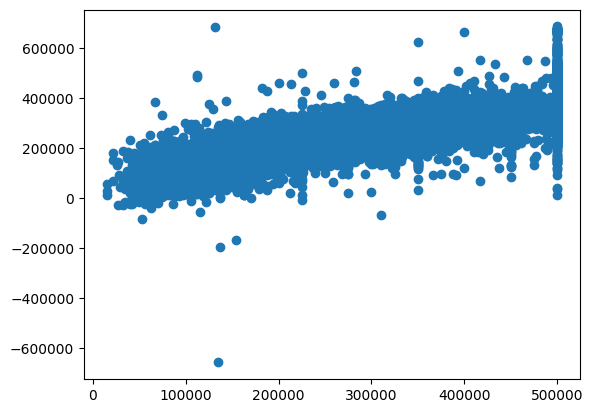

In [35]:
plt.plot(y, y_hat, "o") ##o represents scatter plot

In [36]:
from sklearn.metrics import r2_score# r2score will give the accuracy

In [37]:
r2_score(y,y_hat)

0.6438078977486326

In [1]:
yhat_test = lr.predict(test_arr)

NameError: name 'lr' is not defined

In [40]:
y_test = np.array(test_df.median_house_value)
y_test

array([500001., 162500., 204600., ..., 293800., 335700., 215600.])

In [42]:
r2_score(y_test,yhat_test)

-66127739407159.734

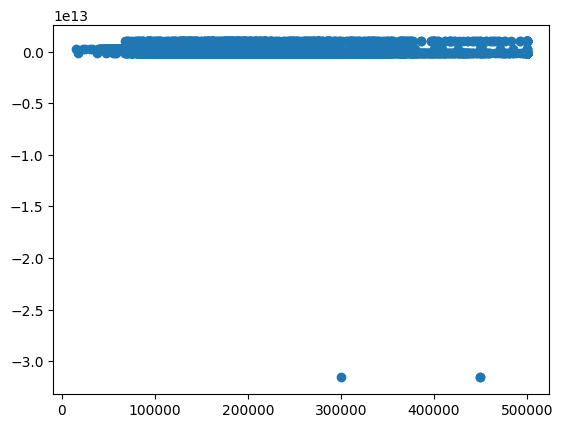

In [41]:
plt.plot(y_test,yhat_test, "o")